# Table of Contents

<div class="alert alert-black alert-info" style="margin-top:20px">

1. [**Problem Description**](#1)
2. [**Gurobi**](#2)
3. [**References**](#3)
    
    
</div>

# 1- Problem Description<a id="1"></a>

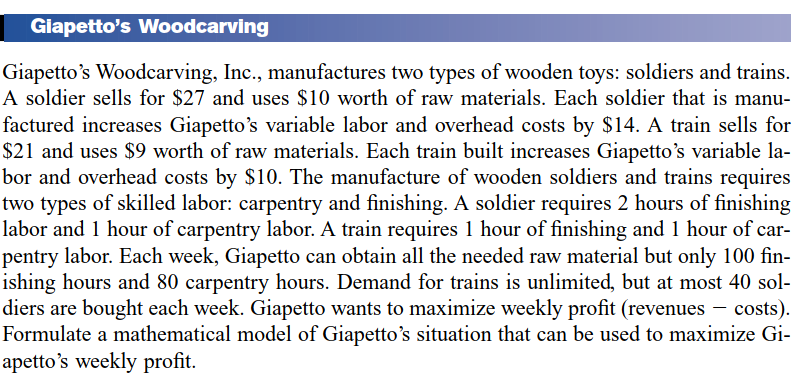

## Mathematical Model

**Sets**:<br>
<i> **I** = {soldier, trains}(number of products)</i>

<b>Parameters</b>:<br>
<i> revenues [27, 21]<br>
    material [19, 9 ]<br>
    overhead [14, 10]<br>
    carpentry [1, 1] #hour<br>
    finishing [2, 1] #hour<br>
    resorce [80, 100] corresponding carpentory and finishing.<br><br>
</i>
<b>Variables</b><br>
<b>X1:</b> <i> How many sodiers should be manufactured.</i><br>
<b>X2:</b> <i> How many trains  should be manufactured.</i><br><br>
$$\begin{align}
\max Z = &\sum_{i=0}^{I} (revenues_{i} - material_{i} - overhead_{i})*X_{i}\\
\text {S.t}\\
&\sum_{i=0}^{I} finishing_{i}*X_{i} \leq 100\\
&\sum_{i=0}^{I} carpentry_{i}*X_{i} \leq 80\\
&X_{1}\leq 40\\
&X_{i} \geq 0 & \forall i \in I\\
\end{align}$$

# 2- Gurobi <a id='2'></a>

In [1]:
from gurobipy import GRB,Model,quicksum

In [2]:
def Output(m):  
    # Print the result
    status_code = {1:'LOADED', 2:'OPTIMAL', 3:'INFEASIBLE', 4:'INF_OR_UNBD', 5:'UNBOUNDED'} #this is how a 'dictionary' 
                                                                                            #is defined in Python
    status = m.status
    
    print('The optimization status is ' + status_code[status])
    if status == 2:    
        # Retrieve variables value
        print('Optimal solution:')
        for v in m.getVars():
            print(str(v.varName) + " = " + str(v.x))    
        print('Optimal objective value: ' + str(m.objVal) + "\n")

In [3]:
def Gurobi_Model(variables, revenues, materials, overhead, finishing, carpentry, maxdemand):
    
    model = Model('Giapetto')
    
    model.setParam('OutputFlag', True)
    n = len(variables)
    
    variables = model.addVars(n, lb = 0,  ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = variables)
    
    model.setObjective( quicksum((revenues[i] - materials[i] - overhead[i])*variables[i] for i in range(n)), GRB.MAXIMIZE)
    
    model.addConstr(quicksum(finishing[i]*variables[i] for i in range(n)) <= 100)
    model.addConstr(quicksum(carpentry[i]*variables[i] for i in range(n)) <= 80)
    model.addConstrs(variables[i] <= maxdemand[i]       for i in range(n))
    
    model.optimize()
    
    Output(model)
    
#     m.write('Giapetto.lp')
    
#     # print the sol file
#     m.write('Giapetto.sol')

In [4]:
Variables = ["soldier", "trains"]
Revenues = [27, 21]
Material = [19, 9]
Overhead = [14, 10]
Finishing= [2, 1]
Carpentry= [1, 1]
MaxDemand= [40, GRB.INFINITY]

Gurobi_Model(Variables, Revenues, Material, Overhead, Finishing,Carpentry, MaxDemand)

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-4210U CPU @ 1.70GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x26f845b1
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 1e+100]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 4 rows and 2 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.600000000e+02
The optimization status is OPTIMAL

# 3- Reference <a id='3'></a>

[**Operations Research** Wayne L.Winston, page49](https://itslearningakarmazyan.files.wordpress.com/2015/09/operation-research-aplications-and-algorithms.pdf)